# Beside the Point

> Two random points, one red and one blue, are chosen uniformly and independently from the interior of a square. To ten decimal places, what is the probability that there exists a point on the side of the square closest to the blue point that is equidistant to both the blue point and the red point?

<center>
<img src="media/problem.png" width=400 />
</center>

This was a very fun and interesting problem. 
I decided to solve it directly, but there are several ways to solve it numerically (see [below](#alternative-approaches)).
My analytical solution involves surprisingly little probability theory and relies mostly on geometric ideas, which makes this puzzle very intuitive.

## Setup

Let $(X_b, Y_b)$ and $(X_r, Y_r)$ be the coordinates of the blue and red point, respectively.
(Note that I chose upper-case letters to emphasize that these are random variables.)

Further, we choose the square be the unit square centered at (0.5, 0.5).
This particular choice will simplify some calculations, others work equally well.

The first key insight into this problem is that it is symmetric with respect to rotations by 90 degrees.
In other words, once the two points are chosen, the square can always be re-oriented such that the side closest to the blue point is on the bottom.
Note that while this does not affect the probability of the result, it _does_ affect the distribution of the blue point: 
Instead of choosing it uniformly over the entire square, the blue point is now chosen uniformly over the triangle between the x-axis and the midpoint of the square.

<div class="alert alert-block alert-success"> 
    <b>💡 Key Insight:</b> Instead of drawing the blue point from the entire square, draw it from the lower trangle of the square. This collapses a lot of the cases to consider.
</div>

Lastly, let $p = (X_p, 0)$ be the point equidistant to the red and the blue point.
In this setup, $p$ is _not_ necessarily on the lower side of the square; it may be anywhere on the x-axis!
In fact, we will soon see that this point does not always exist (but when it does, it is unique).

To solve the problem, we are interested in the probability of the event "$0 \leq X_p \leq 1$", i.e., the probability that $p$ lies within the bottom side of the square. 
To simplify notation, let $Z$ be an indicator random variable for this event.

## Reasoning About the Location of $p$

First, consider the trivial scenario where $X_b = Y_b$, i.e., when the two points are on the same horizontal line.
In this case, $p$ is located directly below the midpoint $m = (X_b + X_r / 2, Y_b + Y_r / 2)$.

Starting from this scenario, how does $p$ move as the blue and red point move?
This is best explored graphically:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive, FloatSlider

def plot_graph(theta):
    fig, ax = plt.subplots(figsize=(15, 12))

    x_blue, y_blue = 0.5, 0.4
    radius = 0.2

    # Set up the coordinate system
    ax.grid(True, alpha=0.2)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-1.5, 2.5, 0.1))
    ax.set_yticks(np.arange(0, 1.5, 0.1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(-1.5, 2.5)
    ax.set_ylim(0,1.5)

    # Draw the square
    ax.plot([0,0], [0,1], c='k')
    ax.plot([0,1], [1,1], c='k')
    ax.plot([1,1], [1,0], c='k')

    # Draw the triangular region in which the blue point is sampled
    ax.fill([0, 0.5, 1], [0, 0.5, 0], c='lightcyan')
    ax.plot([0,0.5],[0,0.5], 'k--', linewidth=0.5)
    ax.plot([0.5,1.0],[0.5,0], 'k--', linewidth=0.5)

    # Draw the blue point
    ax.scatter(x_blue, y_blue, s=15, zorder=2, c='b')

    # Draw quadrants of the blue point
    ax.plot((x_blue, x_blue), (0, 1), 'k--', alpha=0.4)
    ax.plot((0, 1), (y_blue, y_blue), 'k--', alpha=0.4)

    # Draw the red point
    x_red = x_blue + radius * np.cos(theta)
    y_red = y_blue + radius * np.sin(theta)
    ax.scatter(x_red, y_red, s=15, zorder=2, c='r')

    # Draw the line segment between the two points
    ax.plot((x_blue, x_red), (y_blue, y_red), c='k', linewidth=1) 

    # Draw the perpendicular onto the x-axis (if it exists)
    if not np.isclose(x_blue, x_red):
        x_mid = (x_blue + x_red) / 2
        y_mid = (y_blue + y_red) / 2

        # Compute the x-coordinate of p (see below for derivation)
        x_p = (x_blue**2 - x_red**2 + y_blue**2 - y_red**2) / (2 * (x_blue - x_red))
        ax.plot((x_mid, x_p), (y_mid, 0), c='k', linewidth=1)

theta_slider = FloatSlider(value=0, min=0, max=2*np.pi, step=0.01, description='red point')
interactive_plot = interactive(plot_graph, theta=theta_slider)
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='red point', max=6.283185307179586, step=0.01), Outpu…

From this animation, it becomes intuitively clear that the the quadrant (with respect to the blue point) in which the red point is located, $p$ will lie either to the left or right of $m$.
The directions for each quadrant are summarized by the figure below:

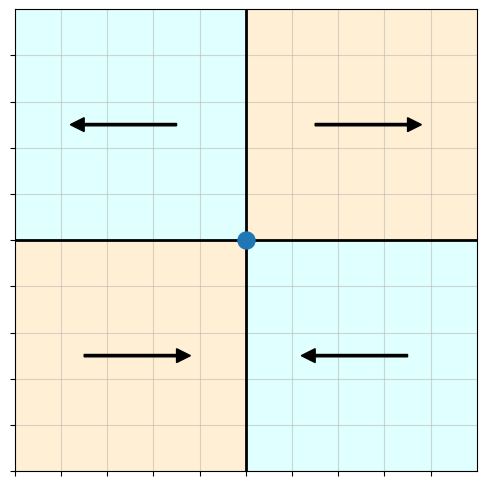

In [2]:
x_blue, y_blue = 0.5, 0.5

fig, ax = plt.subplots(figsize=(6, 6))

# Set up the coordinate system
ax.grid(True, alpha=0.5)
ax.set_aspect('equal')
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(0,1)
ax.set_ylim(0,1)

# Draw the blue dot
ax.fill([x_blue, 1, 1, x_blue], [y_blue, y_blue, 1, 1], "papayawhip")
ax.fill([x_blue, x_blue, 0, 0], [y_blue, 1, 1, y_blue], "lightcyan")
ax.fill([0, x_blue, x_blue, 0], [0, 0, y_blue, y_blue], "papayawhip")
ax.fill([x_blue, 1, 1, x_blue], [0, 0, y_blue, y_blue], "lightcyan")

ax.plot([0, 1], [y_blue, y_blue], linewidth=2, c='k')
ax.plot([x_blue, x_blue], [0, 1], linewidth=2, c='k')
ax.scatter(x_blue, y_blue, s=150, zorder=2)

# Draw the arrows
# (x,y,dx)
arrows = [
    (0.35, 0.75, -0.2),
    (0.65, 0.75, 0.2),
    (0.15, 0.25, 0.2),
    (0.85, 0.25, -0.2)
]

for (x, y, dx) in arrows:
    ax.arrow(x, y, dx, 0, width=0.005, head_width=0.03, head_length=0.03, zorder=3, color='k')

plt.show()



<div class="alert alert-block alert-success"> 
    <b>💡 Key Insight:</b> Depending on the quadrant (with respect to the blue point) in which the red point is located, p will lie either to the left or right of m.
</div>

Let's prove this intuition exemplarily for the upper-left quadrant:
Since $p$ lies on the x-axis, it forms right triangles with the x-axis and either the red and the blue point.
Further, since $p$ is equidistant to these points, the hypothenuses must be of equal length:

$$
\sqrt{(X_b - X_p)^2 + Y_b^2} = \sqrt{(X_r - X_p)^2 + Y_r^2}
$$

Solving for $X_p$:

$$
\begin{align*}
X_p &= \frac{X_b^2 - X_r ^2 + Y_b^2 - Y_r^2}{2(X_b^2 - X_r^2)} \\
&= \frac{(X_b - X_r)(X_b + X_r) + Y_b^2 - Y_r^2}{2(X_b^2 - X_r^2)} \\
&= \frac{(X_b - X_r)\left((X_b + X_r) + \frac{Y_b^2 - Y_r^2}{X_b - X_r}\right)}{2 (X_b - X_r)} \\
&= \frac{X_b + X_r}{2} + \frac{(Y^2_b - Y_r^2)}{2(X_b - X_r)} \\
&= \frac{X_b + X_r}{2} + \frac{\overbrace{(Y_b - Y_r)}^{<0\textnormal{, since } Y_r > Y_b}(\overbrace{(Y_b + Y_r)}^{>0\textnormal{, since } Y_r, Y_b \geq 0})}{2\underbrace{(X_b - X_r)}_{>0\textnormal{, since } X_r < X_b}} \\
&< \frac{X_b + X_r}{2} = X_m
\end{align*}
$$

The proofs for the other three quadrants work analogously.

Using this insight, we can determine whether $p$ lies within the square or outside by examining the corner in the direction where $p$ is expected to lie.
Continuing with the example of the upper-left quadrant relative to the blue point:

Since $p$ must lie to the left of $m$, we focus on the left corner.
Let $d_r$ and $d_b$ be the distances of the red and blue points to that corner.
(If $p$ lies exactly at the corner, these distances would be equal (since $p$ is equidistant)).

If $d_r < d_b$, then:

$$
\begin{align*}
&d_r < d_b \\
\iff & \sqrt{X_r^2 + Y_r^2} < \sqrt{X_b^2 + Y_b^2} \\
\iff & X_b^2 - X_r^2 + Y_b^2 - Y_r^2 > 0 
\end{align*}
$$

Thus, 

$$
X_p = \frac{\overbrace{X_b^2 - X_r^2 + Y_b^2 - Y_r^2}^{>0}}{2\underbrace{(X_b - X_r)}_{>0\textnormal{, since } X_r < X_b}} > 0
$$

in summary, $p$ lies between $(0, (x_b + x_r) / 2]$, i.e. inside the square.
By the same argument, if $d_r > d_b$, then $X_p < 0$ and $p$ lies outside the square.
The proof for the other quadrants, again, works analogously.

<div class="alert alert-block alert-success"> 
    <b>💡 Key Insight:</b> We can deduce whether p lies inside the sqaure or outside by comparing the distances of the red and blue points to the corner in the direction in which p must lie.
</div>

Repeating this process for all four quadrants leads to the following picture for a fixed blue point $(x_b, y_b)$.
Shaded regions indicate the positions of the red point for which $p$ lies within the bounds of the square:

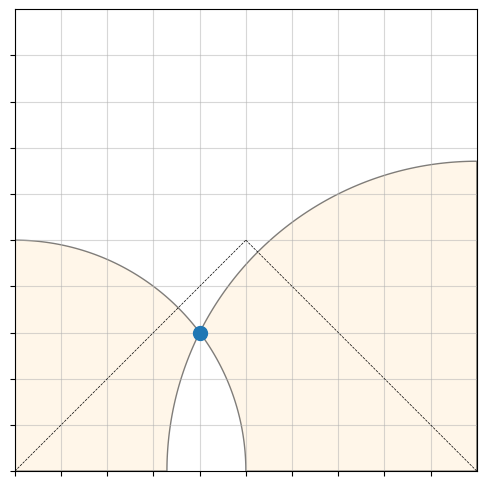

In [3]:
from matplotlib.patches import PathPatch
from matplotlib.path import Path

x_blue, y_blue = 0.4, 0.3

fig, ax = plt.subplots(figsize=(6, 6))

# Set up the coordinate system
ax.grid(True, alpha=0.5)
ax.set_aspect('equal')
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(0,1)
ax.set_ylim(0,1)

# Draw the triangular region in which the blue point is sampled
ax.plot([0,0.5],[0,0.5], 'k--', linewidth=0.5)
ax.plot([0.5,1.0],[0.5,0], 'k--', linewidth=0.5)

# Compute the distances of the blue point from the corners
d1 = np.hypot(x_blue, y_blue)
d2 = np.hypot(1 - x_blue, y_blue)

# Compute the interior angles of the line segments from the corners to the blue point and the x-axis
theta1 = np.tanh(y_blue/x_blue)
theta2 = np.tanh(y_blue/(1-x_blue))

# Compute the arcs bounding the shaded region
def arc(center, radius, start_angle, end_angle):
    theta = np.linspace(start_angle, end_angle, 100)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    return np.column_stack([x, y])

arc1 = arc((0, 0), d1, np.pi/2, theta1)
arc2 = arc((0, 0), d1, theta1, 0)
arc3 = arc((1, 0), d2, np.pi/2, np.pi - theta2)
arc4 = arc((1, 0), d2, np.pi - theta2, np.pi)

# Draw the shaded region
ax.add_patch(PathPatch(Path(np.vstack([arc1, arc4, [0,0], arc1[0]])), facecolor='papayawhip', alpha=0.5))
ax.add_patch(PathPatch(Path(np.vstack([arc3, arc2, [1,0], arc3[0]])), facecolor='papayawhip', alpha=0.5))

# Draw the blue point
ax.scatter(x_blue, y_blue, s=100, zorder=2)

plt.show()



Since the red point is sampled uniformly and independently, the probability  that the equidistant point exists and falls within the side of the square (for a given blue point) corresponds to the ratio of the shaded area $A(x,y)$ to the total area of the square:

$$
P[Z \mid X_b = x_b, Y_b = y_b] = \frac{A(x_b,y_b)}{\underbrace{\text{Total Area of Square}}_{= 1}} = A(x_b,y_b)
$$

Finally, to compute the overall probability $P[Z]$, we use the law of total probability, integrating over all possible positions of the blue point:

$\mathbb{P}[Z] = \iint_{\displaystyle \bigtriangleup } \mathbb{P}[Z \mid X_b = x_b, Y_b = y_b] \cdot f_{X_b, Y_b}(x_b, y_b) dx_b  dy_b$,

where $f_{X_b,Y_b}$ is the joint probability density function for the coordinates of the blue point, and $\displaystyle \bigtriangleup$ is the domain of the blue point, i.e., the triangle between the bottom side and the midpoint of the square.

## Decomposing $\iint_{\displaystyle \bigtriangleup } A(x_b, y_b) dx_b  dy_b$

Since the blue point is chosen uniformly over a triangle of area $\frac{1}{4}$, the joint density $f_{X_b, Y_b}(x_b,y_b) = 4$ can be moved out of the integral:

$$
\mathbb{P}[Z] = 4 \iint_{\displaystyle \bigtriangleup } \mathbb{P}[Z \mid X_b = x_b, Y_b = y_b]  dx_b dy_b
$$

To compute $\mathbb{P}[Z \mid X_b = x_b, Y_b = y_b]$, i.e., the shaded area from the illustration above, we have to again resort to some geometric ideas:

First, notice that the area is the symmetric difference of two quarter circles located in the bottom corners of the square that both have the blue point as a tangent point.
We can decompose the area of that shape into the sum of the area of the quarter circles minus twice the area of the intersection:

$$
A(x_b, y_b) = A_\text{left circle}(x_b, y_b) + A_\text{right circle}(x_b, y_b) - 2 A_\text{intesection}(x_b, y_b)
$$

The intersection area can be further decomposed into the circular sector between the corner, the x-axis and the blue point minus the triangle that cuts off the circular segment from the sector:

$$
A(x_b, y_b) = A_\text{left circle}(x_b, y_b) + A_\text{right circle}(x_b, y_b) - 2 \left(A_\text{left sector}(x_b, y_b) - A_\text{left triangle}(x_b, y_b) + A_\text{right sector}(x_b, y_b) - A_\text{left triangle}(x_b, y_b)\right)
$$

<div class="alert alert-block alert-success"> 
    <b>💡 Key Insight:</b> The area under the integral can be decomposed into primitive shapes.
</div>

Now, notice that while $A_\text{left circle}(x_b, y_b)$ and $A_\text{right circle}(x_b, y_b)$ are generally not equal, _their integral over_ $\bigtriangleup$ _is_, due to the symmetry around $x=0.5$.
This applies not only to the quarter cirles, but to all shapes we integrate over.
The proof for this is tedious, but it should be clear intuitively.

With this insight (and the fact that integration is a linear operator), the integral over $A(x_b, y_b)$ can be simplified to:

$$
\begin{align*}
\iint_{ \bigtriangleup } A(x_b, y_b) dx_b , dy_b &= \iint_{ \bigtriangleup } A_\text{left circle}(x_b, y_b) + A_\text{right circle}(x_b, y_b) - 2 \left(A_\text{left sector}(x_b, y_b) - A_\text{left triangle}(x_b, y_b) + A_\text{right sector}(x_b, y_b) - A_\text{left triangle}(x_b, y_b)\right) dx_b  dy_b \\
&= \iint_{ \bigtriangleup } 2 A_\text{left circle}(x_b, y_b) - 4 \left(A_\text{left sector}(x_b, y_b) - A_\text{left triangle}(x_b, y_b)\right) dx_b  dy_b
\end{align*}
$$

<div class="alert alert-block alert-success"> 
    <b>💡 Key Insight:</b> For each shape, the integral over the left and right version is identical, due to symmetry of the domain and linearity.
</div>

## Integrating over Shapes

Thanks to linearity, each shape can be integrated individually, which drastically simplifies the calculation. 

Integrating $A_\text{left triangle}(x_b, y_b)$ is straight-forward. 
Note that to integrate over the triangular domain, we have to split the integral in two parts:

$$
\begin{align*}
\iint_{ \bigtriangleup } A_\text{left triangle}(x_b, y_b) dx_b  dy_b &= \underbrace{\int_{0}^{0.5} \int_{0}^{x} A_\text{left triangle}(x_b, y_b) dy_b dx_b}_{\text{left half}} + \underbrace{\int_{0.5}^{1} \int_{0}^{1-x} A_\text{left triangle}(x_b, y_b) dy_b dx_b}_{\text{right half}} \\
&= \underbrace{\int_{0}^{0.5} \int_{0}^{x} \frac{1}{2} x_b y_b dy_b dx_b}_{\text{left half}} + \underbrace{\int_{0.5}^{1} \int_{0}^{1-x} \frac{1}{2} x_b y_b dy_b dx_b}_{\text{right half}}
\end{align*}
$$

In [4]:
from sympy import Rational, symbols, integrate

x, y = symbols('x, y')

area_triangle = Rational(1,2) * x * y

integrate(integrate(area_triangle, (y, 0, x)), (x, 0, Rational(1,2))) + integrate(integrate(area_triangle, (y, 0, 1-x)), (x, Rational(1,2), 1))

1/96

Integrating $A_\text{left circle}(x_b, y_b)$ and $A_\text{left sector}(x_b, y_b)$ is considerably harder, because the circular elements introduce trigonometric functions into the integration.
However, there is again a trick: reparameterization to polar coordinates. 

$$
\begin{align*}
\iint_{ \bigtriangleup } A_\text{left circle}(x_b, y_b) dx_b  dy_b = \int_0^{\frac{\pi}{4}} \int_0^{\frac{1}{\cos \theta + \sin \theta}} \underbrace{r}_{\text{Jacobi factor}} \cdot \frac{1}{4} \pi r^2 dr d\theta 
\end{align*}
$$

<div class="alert alert-block alert-success"> 
    <b>💡 Key Insight:</b> Reparameterizing the circular shapes in terms of polar coordinates simplifies the integration substantially.
</div>

<div class="alert alert-block alert-info"> 
<b>Note:</b> Initially, I forgot to multiply the transformed integrated function withe the determinant of the Jacobian of the transform. That cost me about three days. Revise your elementary Calculus!
</div>

In [5]:
from sympy import cos, sin, pi

r, theta = symbols('r, theta')

area_circle = Rational(1, 4) * pi * r **2 
integrate(integrate(r * area_circle, (r, 0, 1/(cos(theta) + sin(theta)))), (theta, 0, pi/4))

pi*(12*(-1 + sqrt(2))**4/(-18*sqrt(2) - 27*(-1 + sqrt(2))**2 - 18*(-1 + sqrt(2))**5 + 3*(-1 + sqrt(2))**6 + 27*(-1 + sqrt(2))**4 + 12*(-1 + sqrt(2))**3 + 15) - 6*(-1 + sqrt(2))**5/(-18*sqrt(2) - 27*(-1 + sqrt(2))**2 - 18*(-1 + sqrt(2))**5 + 3*(-1 + sqrt(2))**6 + 27*(-1 + sqrt(2))**4 + 12*(-1 + sqrt(2))**3 + 15) - 4*(-1 + sqrt(2))**3/(-18*sqrt(2) - 27*(-1 + sqrt(2))**2 - 18*(-1 + sqrt(2))**5 + 3*(-1 + sqrt(2))**6 + 27*(-1 + sqrt(2))**4 + 12*(-1 + sqrt(2))**3 + 15) - 12*(-1 + sqrt(2))**2/(-18*sqrt(2) - 27*(-1 + sqrt(2))**2 - 18*(-1 + sqrt(2))**5 + 3*(-1 + sqrt(2))**6 + 27*(-1 + sqrt(2))**4 + 12*(-1 + sqrt(2))**3 + 15) - 6*(-1 + sqrt(2))/(-18*sqrt(2) - 27*(-1 + sqrt(2))**2 - 18*(-1 + sqrt(2))**5 + 3*(-1 + sqrt(2))**6 + 27*(-1 + sqrt(2))**4 + 12*(-1 + sqrt(2))**3 + 15))/16

Here, SymPy seems to have trouble simplifying the reuslt further.
Wolfram Alpha produces $\frac{\pi}{48}$.

In [6]:
# Consistency check:
print(f"Sympy result: {integrate(integrate(r * area_circle, (r, 0, 1/(cos(theta) + sin(theta)))), (theta, 0, pi/4)).evalf()}")
print(f"Wolfram Alpha result: {(pi/48).evalf()}")

Sympy result: 0.0654498469497874
Wolfram Alpha result: 0.0654498469497874



Lastly, $A_\text{left sector}(x_b, y_b)$:

$$
\begin{align*}
\iint_{ \bigtriangleup } A_\text{left sector}(x_b, y_b) dx_b  dy_b = \int_0^{\frac{\pi}{4}} \int_0^{\frac{1}{\cos \theta + \sin \theta}} \underbrace{r}_{\text{Jacobi factor}} \cdot \frac{\theta}{2\pi} \pi r^2 dr d\theta 
\end{align*}
$$

In [7]:
area_sector = theta/(2*pi) * pi * r**2 
integrate(integrate(r * area_sector, (r, 0, 1/(cos(theta) + sin(theta)))), (theta, 0, pi/4))

pi/(16*(-36*sqrt(2) - 54*(-1 + sqrt(2))**2 - 36*(-1 + sqrt(2))**5 + 6*(-1 + sqrt(2))**6 + 54*(-1 + sqrt(2))**4 + 24*(-1 + sqrt(2))**3 + 30)) + 3*(-1 + sqrt(2))*log((-1 + sqrt(2))**2 + 1)/(4*(-36*sqrt(2) - 54*(-1 + sqrt(2))**2 - 36*(-1 + sqrt(2))**5 + 6*(-1 + sqrt(2))**6 + 54*(-1 + sqrt(2))**4 + 24*(-1 + sqrt(2))**3 + 30)) + (-1 + sqrt(2))**3/(2*(-36*sqrt(2) - 54*(-1 + sqrt(2))**2 - 36*(-1 + sqrt(2))**5 + 6*(-1 + sqrt(2))**6 + 54*(-1 + sqrt(2))**4 + 24*(-1 + sqrt(2))**3 + 30)) + 9*(-1 + sqrt(2))**2*log((-1 + sqrt(2))**2 + 1)/(8*(-36*sqrt(2) - 54*(-1 + sqrt(2))**2 - 36*(-1 + sqrt(2))**5 + 6*(-1 + sqrt(2))**6 + 54*(-1 + sqrt(2))**4 + 24*(-1 + sqrt(2))**3 + 30)) + log((-1 + sqrt(2))**2 + 1)/(8*(-36*sqrt(2) - 54*(-1 + sqrt(2))**2 - 36*(-1 + sqrt(2))**5 + 6*(-1 + sqrt(2))**6 + 54*(-1 + sqrt(2))**4 + 24*(-1 + sqrt(2))**3 + 30)) + 3*pi*(-1 + sqrt(2))**4/(16*(-36*sqrt(2) - 54*(-1 + sqrt(2))**2 - 36*(-1 + sqrt(2))**5 + 6*(-1 + sqrt(2))**6 + 54*(-1 + sqrt(2))**4 + 24*(-1 + sqrt(2))**3 + 30)) + (-

Again, SymPy struggles. Wolfram Alpha yields a more reasonable $\frac{1}{192}(1 + \log(4))$.

<div class="alert alert-block alert-info"> 
<b>Note:</b> I'm neither sure why SymPy produces these results, nor why SymPy's solution is complex. This is something I want to investigate...
</div>

In [8]:
# Consistency check:
from sympy import log

print(f"Sympy result: {integrate(integrate(r * area_sector, (r, 0, 1/(cos(theta) + sin(theta)))), (theta, 0, pi/4)).evalf()}")
print(f"Wolfram Alpha result: {Rational(1/192) * (1 + log(4)).evalf()}")

Sympy result: 0.0124286164641661 + 0.e-22*I
Wolfram Alpha result: 0.0124286164641661


Finally, piecing the entire integral together:

$$
\begin{align*}
\mathbb{P}[Z] &= 4 \iint_{\displaystyle \bigtriangleup } \mathbb{P}[Z \mid X_b = x_b, Y_b = y_b]  dx_b dy_b \\
&= 4 \iint_{\displaystyle \bigtriangleup } 2 A_\text{left circle}(x_b, y_b) - 4 \left(A_\text{left sector}(x_b, y_b) - A_\text{left triangle}(x_b, y_b)\right) dx_b  dy_b \\
&= 4 \left( 2 \cdot \frac{\pi}{48} - 4 \cdot \left( \frac{1}{192}(1 + \log(4))  - \frac{\pi}{48} \right) \right) \\
&= \frac{2 + 2\pi - \log(2)}{12}
\end{align*}
$$

## Alternative Approaches

I see a number of alternative routes to solve this problem.


1. In the beginning, we already derived an exact equation for $X_p$. In theory, this could be used to determine $\mathbb{P}[Z] = \mathbb{P}[0 \leq X_p \leq 1]$ directly. However, this would involve finding and integrating the probability density function of $X_p =\frac{X_b^2 - X_r ^2 + Y_b^2 - Y_r^2}{2(X_b^2 - X_r^2)}$. This looks incredibly painful, but perhaps it's possible.

2. Much easier would be integrate $\mathbb{P}[0 \leq X_p \leq 1]$ numerically using a Monte-Carlo. I tried this initially, but couldn't get the result to converge.

<div class="alert alert-block alert-info"> 
<b>Note:</b> While trying this I noticed that I know very little about Monte-Carlo simulations, like speed of convergence, bounding errors, etc. This is something I plan to read up on.
</div>

3. In a similar manner, $A(x_b, y_b)$ could be integrated numerically.
